# Unsupervised Learning

## Supervised Review

<img align="right" style="padding-right:10px;" src="figures_wk6/supervised_unsupervised.png" width=500><br>
Last week we looked at **Supervised** machine learning -- using labeled data to train and test the model -- and compared performance of several **regression** and **classification** algorithms. 

Supervised algorithms are generally used for **predictive modeling** -- trying to guess or predict some unknown value or category based on past observations. 

Supervised models can be trained on small, medium or large data sets. If the data set is **too large**, `sklearn` has tools to help randomly, but evenly, sample the data to make training easier.

## Unsupervised Overview

In contrast, **Unsupervised** machine learning uses **_unlabeled_** data. Because of this, there is no predictive ability. "Accuracy" can be measured using a silhouette score, which tries to determine if a point is in the correct cluster. 

Unsupervised learning is, therefore, most often used for **clustering** -- finding patterns and associations that may not be easily observable. 

# K-Means Algorithm

K-means is one of the most popular and easiest to understand of the clustering algorithms.

A cluster refers to a collection of data points aggregated together because of certain similarities.
**You’ll define a target number k**, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the errors as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

## How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:
* The centroids have stabilized — there is no change in their values because the clustering has been successful.
* The defined number of iterations has been achieved.

### Demo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

sns.set()

import warnings
warnings.filterwarnings("ignore")

#### Generate a dataset 

In [2]:
# creating two clusters of data points
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

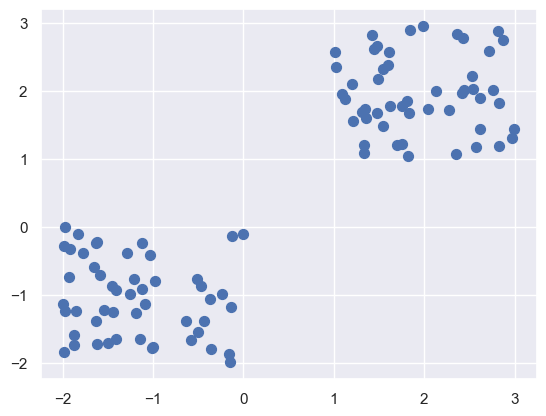

In [3]:
# plotting our dataset
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

Okay, I know our data is already "clustered" in this example.  Trust me, this will make sense in a minute!

#### K-Means algorithm to determine centroids

We will fit our dataset with the sklearn K-Mean algorithm and then determine the centroids for the two clusters.

In [4]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

`cluster_centers_` is a model attribute that shows the coordinates of each cluster's center point.

In [5]:
# finding the centroids
Kmean.cluster_centers_

array([[-1.19077973, -1.03773672],
       [ 1.94309031,  1.95349303]])

#### Visualize the dataset and centroids

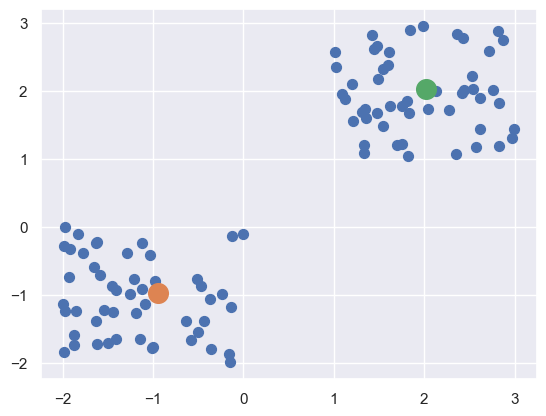

In [6]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-0.94665068, -0.97138368, s=200)
plt.scatter(2.01559419, 2.02597093, s=200)
plt.show()

Remember, a centroid is the imaginary or real location representing the center of the cluster. 

#### Verify the algorithm labels

Let's see which cluster our K-Mean algorithm predicts the point (-3,-3) will belong to.

The `labels_` attribute shows which cluster each point belongs to.

In [7]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
sample_test=np.array([-3.0,-3.0])

# Array must be reshaped to be 2D
second_test=sample_test.reshape(1, -1)

In [9]:
pred = Kmean.predict(second_test)

At this point, `pred` will contain the cluster label that the point belongs to:

In [10]:
print(f'The point {sample_test} belongs to cluster {pred}')

The point [-3. -3.] belongs to cluster [0]


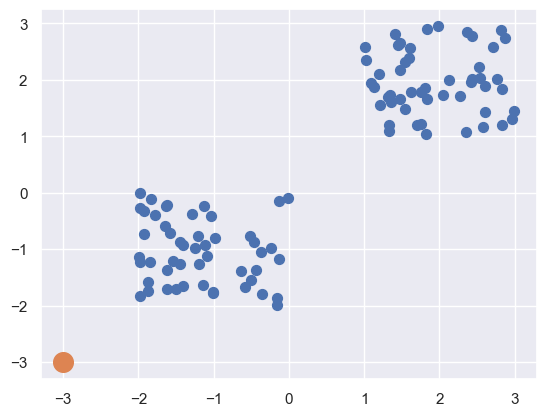

In [11]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-3, -3, s=200)

plt.show()

Always happy to see when things work out!  The point (-3,-3) does appear to be closer to the lower cluster.

I know that was a very simplified example, but we will get to the more complex stuff shortly.

## K-Means Demo - Wisconsin Breast Cancer dataset

For this demo we will be using the Wisconsin Breast Cancer data. Based on the information in breast-cancer-wisconsin.names file, we will assign the column names for our dataframe as follows:

|Attribute                   | Atribute range           |df column name|
|:--------------------------:|:------------------------:|:------------:|
|Sample code number          | id number                | sample       |
|Clump Thickness             | 1 - 10                   | thickness    |
|Uniformity of Cell Size     | 1 - 10                   | uc_size      |
|Uniformity of Cell Shape    | 1 - 10                   | uc_shape     |
|Marginal Adhesion           | 1 - 10                   | adhesion     |
|Single Epithelial Cell Size | 1 - 10                   | epithelial   |
|Bare Nuclei                 | 1 - 10                   | bare_nuclei  |
|Bland Chromatin             | 1 - 10                   | chromatin    |
|Normal Nucleoli             | 1 - 10                   | norm_nucleoli|
|Mitoses                     | 1 - 10                   | mitoses      |
|Class                       | benign(2) or malignant(4)| class        |

## Import libraries

**Remember, you only have to import libraries once per notebook. We show it here, in addition to above, as if this was a new notebook.**

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Assign colum names to the dataset
names = ['sample', 'thickness', 'uc_size', 'uc_shape', 'adhesion', 'epithelial', 'bare_nuclei',
         'chromatin', 'norm_nucleoli','mitoses','class']

# Read dataset to pandas dataframe
cancer = pd.read_csv('data_wk6/breast-cancer-wisconsin.data', names=names) 

In [14]:
cancer.head()

,sample,thickness,uc_size,uc_shape,adhesion,epithelial,bare_nuclei,chromatin,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Before we get too far, we will drop cancer['sample'] since it is just an id for the dataset and has no meaning for our clustering.

In [15]:
cancer.drop('sample', axis=1, inplace=True)

In [16]:
cancer.shape

(699, 10)

In [17]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   thickness      699 non-null    int64 
 1   uc_size        699 non-null    int64 
 2   uc_shape       699 non-null    int64 
 3   adhesion       699 non-null    int64 
 4   epithelial     699 non-null    int64 
 5   bare_nuclei    699 non-null    object
 6   chromatin      699 non-null    int64 
 7   norm_nucleoli  699 non-null    int64 
 8   mitoses        699 non-null    int64 
 9   class          699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Cleaning our dataset

We need to do something about the one categorical column that we have in our dataset.

In [18]:
# see what the range of values are in cancer.epithelial
cancer.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [19]:
cancer.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

Ugh!  We have **missing values** in our dataset. The column cancer.bare_nuclei has 16 **'?'**. 

Upon further inspection, we see that there is a 58% chance that these missing values would have been a value of '1'.  I'm going to replace the missing values with a '1'.

In [20]:
# replace '?' with '1'
cancer.bare_nuclei.replace('?',1,inplace=True)

In [21]:
# visually verify the replacement
cancer.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', 1, '5', '8', '6'], dtype=object)

<div class="alert alert-block alert-info">
<b>Take a second look::</b> Notice anything odd in the above results??  Hint! Why is there a '1' and a 1 in that list?
</div>

In [22]:
# change the type of the column
cancer.bare_nuclei = cancer.bare_nuclei.astype(int)

In [23]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   thickness      699 non-null    int64
 1   uc_size        699 non-null    int64
 2   uc_shape       699 non-null    int64
 3   adhesion       699 non-null    int64
 4   epithelial     699 non-null    int64
 5   bare_nuclei    699 non-null    int64
 6   chromatin      699 non-null    int64
 7   norm_nucleoli  699 non-null    int64
 8   mitoses        699 non-null    int64
 9   class          699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


Awesome! We have handled all the missing values and our df is all numeric at this point.

### Split into features and labels

We will split our dataset into two groups. 

In [24]:
# split data into features (X) and labels (y)
X = cancer.iloc[:,0:9]
y = cancer.iloc[:,-1]

### Determine the optimal number of clusters for a kmeans model

The K-Means algorithm assumes the number of clusters as part of the input. If you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.

Plots displaying this information help to determine the number of clusters and are often referred to as **scree plots**. The ideal plot will have an **elbow** where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the **elbow** indicates the number of clusters inherent in the data.

Note:: We are going to "pretend" that we don't know that the outcome of this dataset is really just k=2 clusters.

<img align="left" style="padding-right:10px;" src="figures_wk6/elbow_plot.png" width=700><br>


In [25]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

# import stuff
from sklearn.cluster import KMeans

# determine the optimal number of clusters 
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    # random_start makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


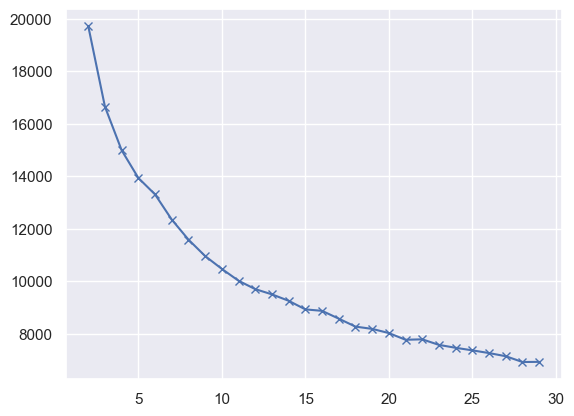

In [26]:
# make our scree plot to visually see the optimal number of clusters

plt.plot(range(2, 30), sum_sq, 'bx-')
# np.diff(sum_sq)
# sum_sq

This first plot is the **scree** plot. From our definition above we are looking at where the measure of model quality **change** slows down. I can see first place this happens is around `k=11`. 

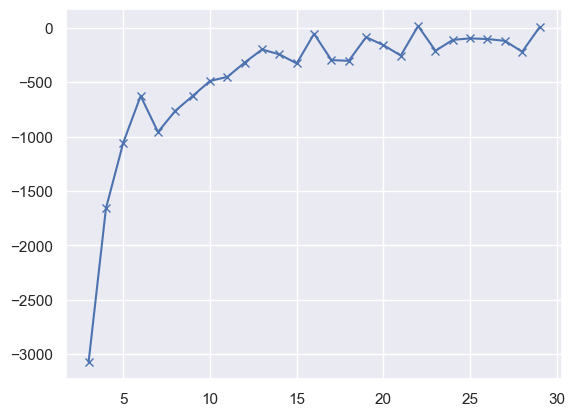

In [27]:
# compare the scree plot with a np.diff() plot

plt.plot(range(3, 30), np.diff(sum_sq), 'bx-')

The second plot, `np.diff()`, can be used to help in the case of a judgement call in reading the scree plot. This plot is graphing the difference between cluster values (k).  Here we look for the first "relatively" flat spot in the graph. In the above `np.diff()` plot, we see out first flat spot is occurring around 9-10 clusters.

At this point it's really a judgement call on what you use. I like the looks of the scree plot better than the `np.diff()` plot and will go with `k=10` for my number of clusters.

<div class="alert alert-block alert-warning">
<b>Note:</b> There are a wide variety of ways to determine the optimal number of clusters. I have just shown you 2 of the possiblities. The follwing articles present additional ways to accomplish finding the optimal number of k. <br>
* https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6 <br>
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html <br>
</div>

### Rerunning with our optimal k value

In [28]:
# kmeans model with the optimal number of clusters, 10 clusters
model = KMeans(n_clusters=11, random_state=42)
model.fit(X)

# gather the predictions
preds= model.predict(X)

In [29]:
preds

array([ 1,  7,  1,  8,  1, 10,  7,  4,  4,  1,  4,  4,  5,  4,  3,  5,  1,
        1,  2,  1,  3,  0,  1,  5,  4,  5,  1,  1,  4,  4,  1,  4,  2,  4,
        1,  4,  8,  1,  3,  7,  9,  5,  2,  9,  8,  4,  0,  4,  1,  0,  5,
        5,  0,  3,  2,  5,  8,  5,  7,  5,  5,  4,  2,  5,  4,  5,  1,  0,
        0,  4,  1,  6,  4,  3,  5,  4,  4,  1,  1,  4,  4,  1,  1,  1, 10,
        6,  7, 10,  1,  4,  4,  1,  1,  4,  4,  4,  4,  1,  6, 10,  0,  5,
        1,  5,  6,  5,  2, 10,  4,  0,  4,  7,  3,  2,  1,  4,  5,  3,  4,
        1,  4,  1,  2,  7, 10,  4,  3,  1,  7,  4,  1,  4, 10,  1,  1,  1,
        1,  1,  1,  4,  1,  4,  5,  4,  4,  4,  7,  4,  5,  6,  4,  7,  8,
        1,  4,  7,  4,  4,  4,  0,  0,  1,  1,  4,  1,  1, 10,  9,  1,  4,
        1,  4,  4,  6,  7, 10,  4,  8,  1,  7,  4,  4,  1, 10,  7,  4, 10,
        6, 10,  4, 10, 10,  1,  4,  1,  1,  0,  1,  4,  1,  0,  2,  4,  1,
        4, 10,  2,  4,  4,  1,  6, 10,  4,  6, 10,  8,  4,  4,  8,  1,  4,
        0,  1,  7,  0,  4

### silhouette scores.

One way to evaluate your model is to use silhouette scores.

<div class="alert alert-block alert-info">
<b> Silhouette score::</b> a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
</div>

In [30]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.259649965155704

**Well, that's a bit disappointing!**  Let's dig into this a bit deeper.  The score above is a mean over all the samples. There might be some clusters that were well seperated and others the are not.

## Visualizing our clusters

We can use a silhouette score to tell us how "separated" the clusters are.  Remember this is a mean value across all of the clusters. I generally like to include a PCA visualization in addition to the silhouette score.

### PCA - 2d visualization of data

**PCA** stands for **Principal Component Analysis** -- A technique for reducing the number of dimensions, or features, of a dataset.

If you have a lot of features in your dataset, PCA can be helpful in feature reduction to avoid the curse of dimensionality (i.e. needing exponentially more data as the number of features grows to do accurate predictions). In this case, PCA remaps the data to a new (smaller) coordinate system which tries to account for the most information possible.

We can *also* use PCA to visualize the data by reducing the features to 2 dimensions and making a scatterplot. 
You can think of this as  "mashing" the data down into 2d from the 4d we have. 

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

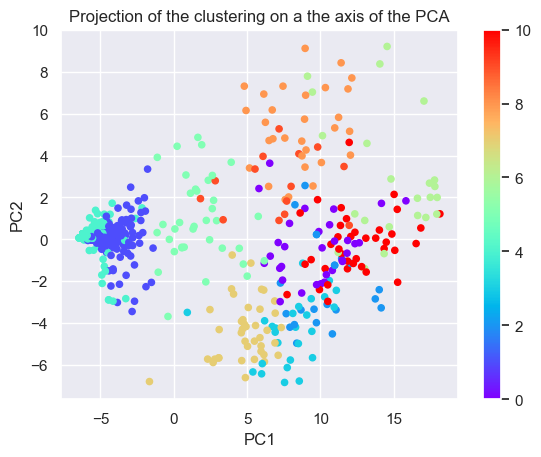

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

Hmmm... That's interesting! There really are not discernible clusters from our model. Which in all honesty, we would expect from this dataset.  We were "pretending" that we didn't know the true number of clusters. But this will give you an idea on how to find the optimal number of clusters.

Which give me an idea!  

**Let's see if we can use the silhouette score to help us determine the number of clusters.**

## Use the silhouette score for clusters

The Scikit-learn documentation has a very good demonstration of using silhouette scores for clustering at [https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

The Scikit-learn demo produces some very nice graphs but I think in this case we can get away with just numbers:

In [32]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    # random_state makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    # gather the predictions
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.5966460360497049
Silhouette score for  3  clusters:  0.5249509990273359
Silhouette score for  4  clusters:  0.5380718938486826
Silhouette score for  5  clusters:  0.2628497849061882
Silhouette score for  6  clusters:  0.3978277987104147
Silhouette score for  7  clusters:  0.2535908755732985
Silhouette score for  8  clusters:  0.2567037651170776
Silhouette score for  9  clusters:  0.25673243307492477
Silhouette score for  10  clusters:  0.25571999549084873
Silhouette score for  11  clusters:  0.259649965155704
Silhouette score for  12  clusters:  0.26580600045232466
Silhouette score for  13  clusters:  0.2561047271666079
Silhouette score for  14  clusters:  0.25573999495880984
Silhouette score for  15  clusters:  0.2581084197407279
Silhouette score for  16  clusters:  0.2316742539138008
Silhouette score for  17  clusters:  0.19187530366274927
Silhouette score for  18  clusters:  0.26524909166764854
Silhouette score for  19  clusters:  0.258867098028

Hmmmm.... Looks like 2 clusters performed the best.  One last thing to do, visualized k=2 in a PCA plot.

In [33]:
# kmeans model with the optimal number of clusters, 2 clusters
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

# gather the predictions
preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.5966460360497049

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

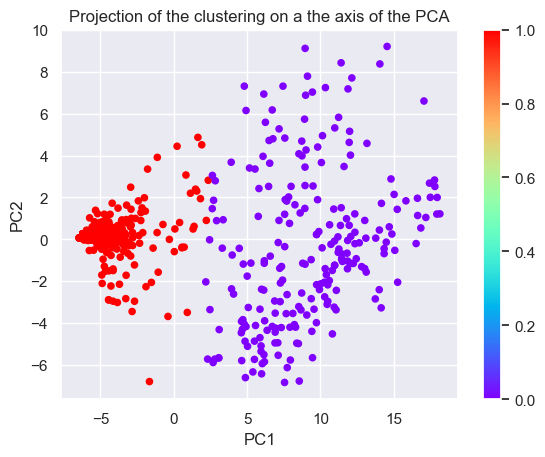

In [34]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

# Color Quantization - Visualizing K-Means clustering

This demo is based from the tutorial [Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html) provided by sklearn. <br>
Special thank you to Dr. Michael Busch for converting the original tutorial from R into Python and creating a set of reusable UDFs.

Performs a pixel-wise Vector Quantization (VQ) of an image of a colorful parrot, reducing the number of colors required to show the image from 96,615 unique colors to 64, 8 and 3, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find the respective color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette.

## Imports that we will need

**Remember, you only have to import libraries once per notebook. We show it here, in addition to above, as if this was a new notebook.**

In [35]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from PIL import Image

%matplotlib inline

## UDFs

To allow us to reuse  the majority of our code, we will create a few User Defined Functions (UDFs).

In [36]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves on float data (need to
# be in the range [0-1])

def to_floats(pic):
    return np.array(pic, dtype=np.float64) / 255

In [37]:
def transform2d(pic):
    original_shape = tuple(pic.shape)
    w, h, d = original_shape
    assert d == 3
    return np.reshape(pic, (w * h, d))

In [38]:
def fit_kmeans(colors, image_array):
    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))
    return kmeans

In [39]:
# Get labels for all points
def predict_labels(kmeans, image_array):
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    return labels

In [40]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

## Load original image

In [41]:
# Load any photo into a Numpy array
image = Image.open("data_wk6/ColorfulBird.jpg")
image = np.array(image)
image.shape

(526, 800, 3)

In [42]:
image = to_floats(image)

## Color reduction with K-Means

In [43]:
image_array = transform2d(image)
kmeans64 = fit_kmeans(64, image_array)
kmeans8 = fit_kmeans(8, image_array)
kmeans3 = fit_kmeans(3, image_array)

Fitting model on a small sub-sample of the data
done in 0.207s.
Fitting model on a small sub-sample of the data
done in 0.080s.
Fitting model on a small sub-sample of the data
done in 0.061s.


In [44]:
labels64 = predict_labels(kmeans64, image_array)
labels8 = predict_labels(kmeans8, image_array)
labels3 = predict_labels(kmeans3, image_array)

Predicting color indices on the full image (k-means)
done in 0.013s.
Predicting color indices on the full image (k-means)
done in 0.008s.
Predicting color indices on the full image (k-means)
done in 0.006s.


## Displaying the new images

526 800 3


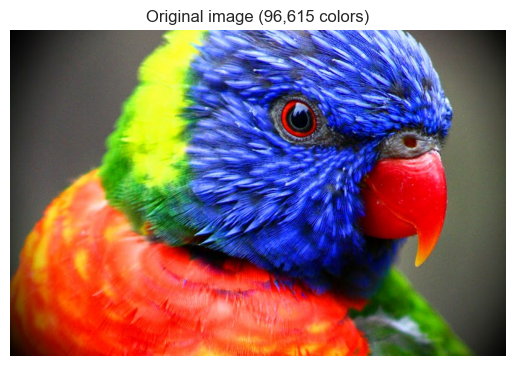

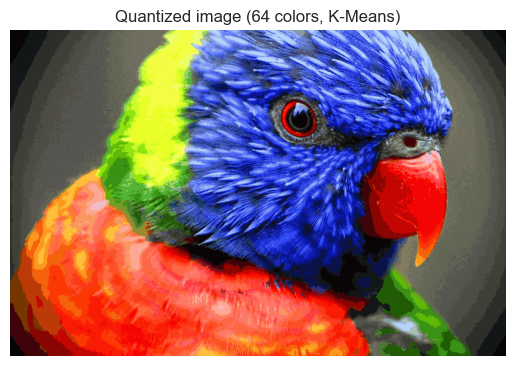

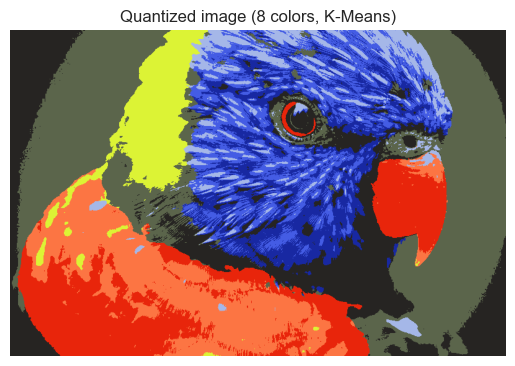

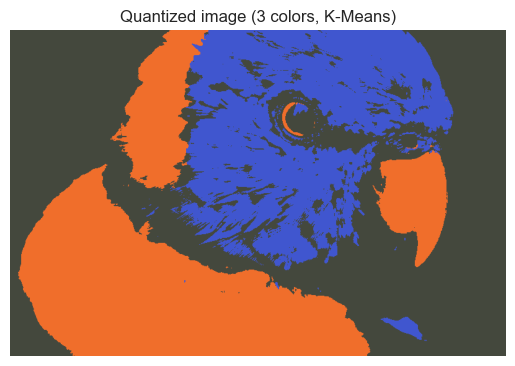

In [45]:
# display image size
w, h, d = image.shape
print(w, h, d)

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, image.shape[0], image.shape[1]))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (8 colors, K-Means)')
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, image.shape[0], image.shape[1]))

plt.figure(4)
plt.clf()
plt.axis('off')
plt.title('Quantized image (3 colors, K-Means)')
plt.imshow(recreate_image(kmeans3.cluster_centers_, labels3, image.shape[0], image.shape[1]))

References: <br>
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 <br>
https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html <br>
http://docs.biolab.si/3/visual-programming/widgets/model/knn.html